<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.156872,44.963951,50.681684,42.572716,-0.000335,212.374888,212.374635,0.000253
1,0.0,1.0,96.618721,71.462516,88.145519,50.253294,0.000882,316.480933,316.479673,0.001259
2,0.0,2.0,34.377085,23.407454,54.504617,73.891791,-0.000825,196.180123,196.180349,-0.000227
3,0.0,3.0,35.031857,73.162198,56.383939,38.879125,-0.000893,213.456227,213.457064,-0.000838
4,0.0,4.0,41.013740,98.280094,73.685104,77.549393,-0.000030,300.528301,300.528905,-0.000605
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.352116,95.404607,72.138811,93.459075,-0.000030,313.354580,313.354341,0.000239
119996,999.0,116.0,69.708296,65.661173,71.592637,34.094932,-0.000084,251.056954,251.057276,-0.000322
119997,999.0,117.0,81.378640,83.772243,36.301790,28.717136,0.000423,240.170232,240.170329,-0.000097
119998,999.0,118.0,37.390185,49.383051,91.397140,54.781449,-0.000912,242.950913,242.951513,-0.000601


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.156872,44.963951,50.681684,42.572716,-0.000335,212.374888,212.374635,0.000253
1,0.0,1.0,96.618721,71.462516,88.145519,50.253294,0.000882,316.480933,316.479673,0.001259
2,0.0,2.0,34.377085,23.407454,54.504617,73.891791,-0.000825,196.180123,196.180349,-0.000227
3,0.0,3.0,35.031857,73.162198,56.383939,38.879125,-0.000893,213.456227,213.457064,-0.000838
4,0.0,4.0,41.013740,98.280094,73.685104,77.549393,-0.000030,300.528301,300.528905,-0.000605
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.352116,95.404607,72.138811,93.459075,-0.000030,313.354580,313.354341,0.000239
119996,999.0,116.0,69.708296,65.661173,71.592637,34.094932,-0.000084,251.056954,251.057276,-0.000322
119997,999.0,117.0,81.378640,83.772243,36.301790,28.717136,0.000423,240.170232,240.170329,-0.000097
119998,999.0,118.0,37.390185,49.383051,91.397140,54.781449,-0.000912,242.950913,242.951513,-0.000601


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.156872,44.963951,50.681684,42.572716,-0.000335,212.374888,212.374635,0.000253
1,0.0,1.0,96.618721,71.462516,88.145519,50.253294,0.000882,316.480933,316.479673,0.001259
2,0.0,2.0,34.377085,23.407454,54.504617,73.891791,-0.000825,196.180123,196.180349,-0.000227
3,0.0,3.0,35.031857,73.162198,56.383939,38.879125,-0.000893,213.456227,213.457064,-0.000838
4,0.0,4.0,41.013740,98.280094,73.685104,77.549393,-0.000030,300.528301,300.528905,-0.000605
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.352116,95.404607,72.138811,93.459075,-0.000030,313.354580,313.354341,0.000239
119996,999.0,116.0,69.708296,65.661173,71.592637,34.094932,-0.000084,251.056954,251.057276,-0.000322
119997,999.0,117.0,81.378640,83.772243,36.301790,28.717136,0.000423,240.170232,240.170329,-0.000097
119998,999.0,118.0,37.390185,49.383051,91.397140,54.781449,-0.000912,242.950913,242.951513,-0.000601


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

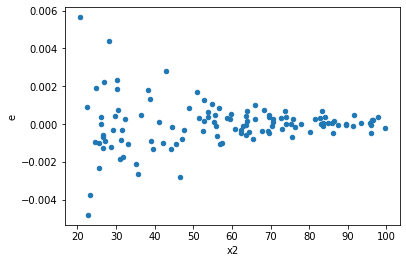

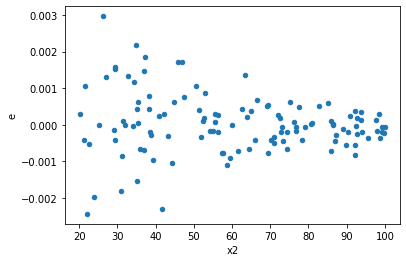

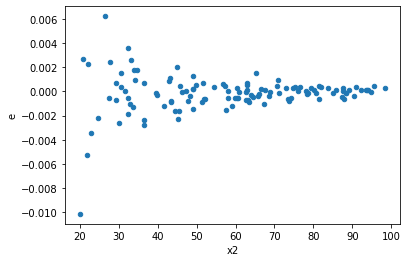

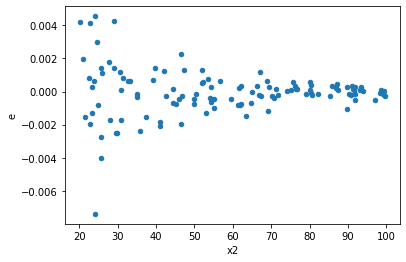

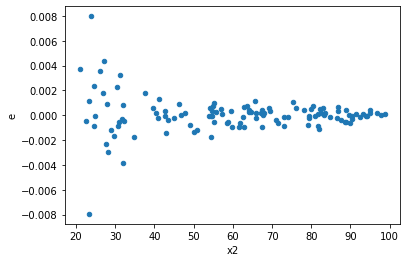

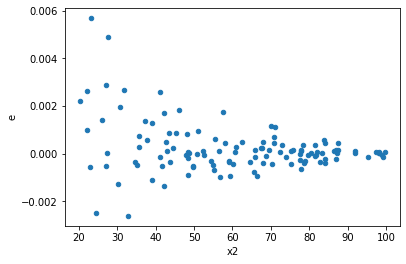

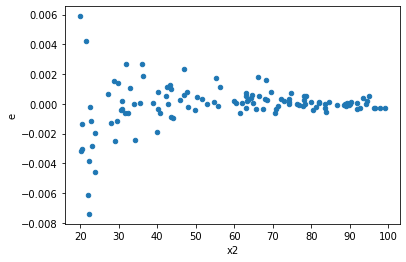

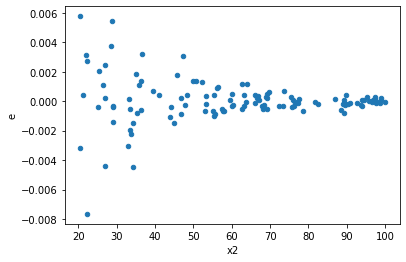

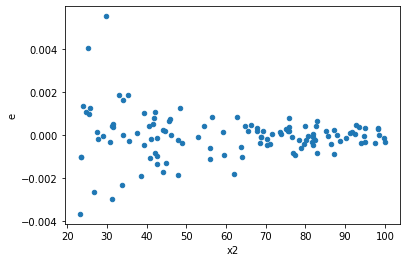

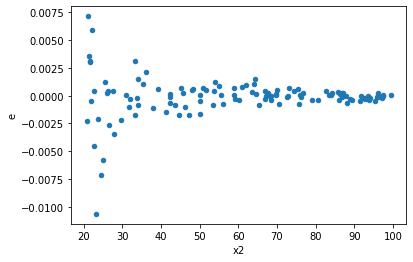

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,44.0,44.0,4.83928552091899e-05,4.925153378539241e-05,1.0998376183906797e-06,1.1193530405771002e-06,1.0177439122467697,0.9537462112592077,0.5231268943703962,0.47687310562960383,Reject005=1 : Homoscedasticity
59.0,44.0,44.0,7.351109523236199e-05,9.042733046055843e-05,1.6707067098264088e-06,2.055166601376328e-06,1.230118122641565,0.49497977226001266,0.7525101138699937,0.24748988613000633,Reject005=1 : Homoscedasticity
74.0,44.0,44.0,6.144227617397102e-05,7.610775077373494e-05,1.3964153675902505e-06,1.7297216084939758e-06,1.2386870329842483,0.4806609282746448,0.7596695358626776,0.2403304641373224,Reject005=1 : Homoscedasticity
121.0,44.0,44.0,4.8323085557653096e-05,5.7742135476760294e-05,1.0982519444921159e-06,1.3123212608354612e-06,1.1949182220135663,0.5572802519743165,0.7213598740128417,0.27864012598715826,Reject005=1 : Homoscedasticity
152.0,44.0,44.0,8.257005432037105e-05,0.00010908982494875895,1.8765921436447968e-06,2.479314203380885e-06,1.3211790381715314,0.3591119609734619,0.8204440195132691,0.17955598048673094,Reject005=1 : Homoscedasticity
175.0,44.0,44.0,0.00011164823274441418,0.00012604273901833902,2.537459835100322e-06,2.8646077049622507e-06,1.1289273096411374,0.6893039450549248,0.6553480274725376,0.3446519725274624,Reject005=1 : Homoscedasticity
200.0,44.0,44.0,6.929692836039605e-05,8.598965788884794e-05,1.5749301900090012e-06,1.9543104065647257e-06,1.2408870050002383,0.4770376710325537,0.7614811644837232,0.23851883551627684,Reject005=1 : Homoscedasticity
276.0,44.0,44.0,3.222945086005212e-05,5.756637291502533e-05,7.324875195466391e-07,1.3083266571596666e-06,1.7861419099255555,0.057452821188626046,0.971273589405687,0.028726410594313023,Reject005=1 : Homoscedasticity
296.0,44.0,44.0,4.7441897403505546e-05,5.4180941481173824e-05,1.0782249409887625e-06,1.2313850336630415e-06,1.1420483675083855,0.6614805194712567,0.6692597402643716,0.3307402597356284,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,7.620900206959772e-05,3.8219484389147785e-05,1.7320227743090393e-06,8.686246452079042e-07,0.5015087896603595,0.024191308528262873,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,0.00023288830931391755,5.6490224909158e-05,5.292916120770853e-06,1.2838687479354091e-06,0.2425635922884091,6.909094713035597e-06,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,4.83928552091899e-05,4.925153378539241e-05,1.0998376183906797e-06,1.1193530405771002e-06,1.0177439122467697,0.9537462112592077,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,0.00016118250581233752,3.131353969870496e-05,3.6632387684622165e-06,7.116713567887491e-07,0.19427381117379366,2.728041287146088e-07,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.00015228914371088825,2.3960376676472007e-05,3.4611169025201874e-06,5.445540153743638e-07,0.15733476525391288,9.790459112372057e-09,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,0.00013300823440074645,1.2275463060884633e-05,3.022914418198783e-06,2.789877968382871e-07,0.09229100075036965,8.829573796973861e-13,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,0.00014109192377951378,3.551282185516401e-05,3.206634631352586e-06,8.071095876173639e-07,0.2516998911338141,1.148904171005649e-05,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,0.00014961954839998092,1.636995069965164e-05,3.400444281817748e-06,3.7204433408299185e-07,0.10941050734820777,1.943797424915054e-11,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.00015970905814902803,3.141086690615298e-05,3.629751321568819e-06,7.138833387762041e-07,0.19667555034256612,3.287289944041514e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    872
Reject005=1 : Homoscedasticity      128
Name: Result_test, dtype: int64